# Temperature dependent hypoxia and the metabolic index

This notebook utilizes data from Penn et al. (2018) to create a manuscript figure that highlights the relationships between temperature and metabolic demand of Mollusca and Arthropoda.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import pandas as pd

## Introduction

The rate of oxygen demand for ectothermic animals is a function of temperature with higher demand at higher temperatures. The ratio between the potential supply and the resting metabolic demand of an organism is called the metabolic index (Deutsch et al. 2015). It can be defined relative to a reference temperature which was put forward in Penn et al. (2018) in order to make the coefficient ($A_o$) be more readily interpreted between species:

\begin{equation}
\Phi = A_o \times \frac{pO_2}{\exp\left(-\frac{E_o}{k_b}\left(\frac{1}{T} - \frac{1}{T_{\text{ref}}}\right)\right)}
\end{equation}

If we set $\Phi = 1$ and solve for $pO_2$:

\begin{equation}
pO_2 = \exp\left(-\frac{E_o}{k_b}\left(\frac{1}{T} - \frac{1}{T_{\text{ref}}}\right)\right)
\end{equation}

Penn et al. (2018) compiled data and calculated the coefficients associated with metabolic index for 61 species that span benthic and pelagic habitats in all ocean basins across four phyla (Arthropoda, Chordata, Mollusca, and Cnidaria). They both considered the minimum requirement for organisms in their resting state ($\Phi = 1$) and determined a threshold for the metabolic index required for sustaining popluations of species which they termed $\Phi^{crit}$. This $\Phi^{crit}$ term is elevated above $\Phi$ by factors between 1.5 and 7.

In the code below, we import this Penn et al. compilation which was extracted from Table S1 of their supplement which was provided as a PDF and is tabulated here into a csv. We then filter it to be the Arthropoda and Mollusca species given that these phyla were abundant in the Ordovician.

In [2]:
Penn2018_MI = pd.read_csv('../data/metabolic_index/Penn2018_S1.csv')
Penn2018_MI_M = Penn2018_MI[(Penn2018_MI['Phylum'] == 'M')]
Penn2018_MI_A = Penn2018_MI[(Penn2018_MI['Phylum'] == 'A')]
Penn2018_MI_A_M = Penn2018_MI[(Penn2018_MI['Phylum'] == 'A') | (Penn2018_MI['Phylum'] == 'M')]
Penn2018_MI_A_M

,Species,Phylum,# Data,Eo (eV),Ao (atm-1),Φcrit
0,Acanthephyra acutifrons,A,2,-0.03,26.8,NaN
1,Acanthephyra curtirostris,A,2,0.04,25.6,NaN
2,Acanthephyra purpurea,A,2,0.13,23.3,2.6
3,Acanthephyra smithi,A,3,-0.03,29.0,NaN
8,Bythograea thermydron,A,3,0.23,52.8,NaN
9,Callinectes sapidus,A,3,0.54,35.5,3.8
10,Cancer irroratus,A,50,0.92,32.1,6.0
11,Carcinus maenas,A,3,0.48,22.3,NaN
13,Crassostrea gigas,M,3,0.21,13.1,NaN
18,Dosidicus gigas,M,2,0.62,40.8,NaN


## Plot metabolic index as a function of temperature

One approach to visualize these parameters is to plot metabolic index as a function of temperature at a fixed pO2.

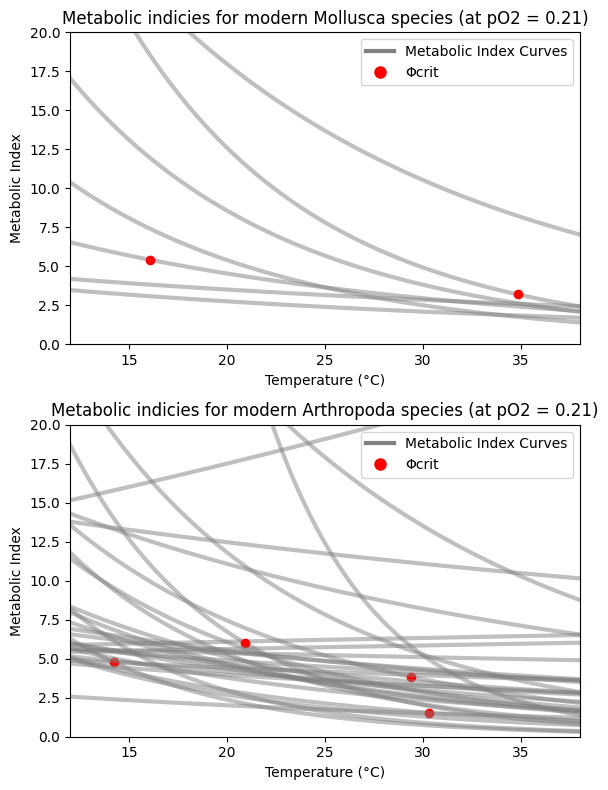

In [3]:
k_b = 8.617333262145e-5  # Boltzmann's constant in eV/K
T_ref = 20 + 273.15  # Convert to Kelvin
pO2 = 0.21  # atm

def metabolic_index(T, A_o, E_o, k_b, T_ref, pO2):
    """
    Calculate the metabolic index for given parameters.
    
    Parameters:
        T (numpy.ndarray): Array of temperatures in Celsius.
        A_o (float): Metabolic index parameter
        E_o (float): Metabolic index parameter
        k_b (float): Boltzmann's constant in eV/K.
        T_ref (float): Reference temperature in Kelvin.
        pO2 (float): Partial pressure of O2 in atm.
        
    Returns:
        numpy.ndarray: Array of computed metabolic indices.
    """
    return A_o * (pO2/np.exp(-E_o/k_b*(1/(T + 273.15) - 1/T_ref)))

def find_nearest(array, value):
    """
    Find the index of the nearest value in the array.
    
    Parameters:
        array (numpy.ndarray): Input array.
        value (float): Value to find.
        
    Returns:
        int: Index of the nearest value.
    """
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Temperature range
T = np.linspace(10, 40, 100)

plt.figure(figsize=(6, 8))
plt.subplot(2,1,1)

for index, row in Penn2018_MI_M.iterrows():
    A_o = row['Ao (atm-1)']
    E_o = row['Eo (eV)']
    MI = metabolic_index(T, A_o, E_o, k_b, T_ref, pO2)
    plt.plot(T, MI, color='grey', linewidth=3, alpha=0.5)
    
    # If 'Φcrit' is in the row, plot the associated temperature as a red dot
    if not np.isnan(row['Φcrit']):
        idx = find_nearest(MI, row['Φcrit'])
        plt.plot(T[idx], MI[idx], 'ro')

plt.ylim(0,20)
plt.xlim(12,38)
plt.xlabel('Temperature (°C)')
plt.ylabel('Metabolic Index')
plt.title('Metabolic indicies for modern Mollusca species (at pO2 = 0.21)')

legend_elements = [
    Line2D([0], [0], color='grey', linewidth=3, label='Metabolic Index Curves'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Φcrit')
]

plt.legend(handles=legend_elements)

plt.subplot(2,1,2)

for index, row in Penn2018_MI_A.iterrows():
    A_o = row['Ao (atm-1)']
    E_o = row['Eo (eV)']
    MI = metabolic_index(T, A_o, E_o, k_b, T_ref, pO2)
    plt.plot(T, MI, color='grey', linewidth=3, alpha=0.5)
    
    # If 'Φcrit' is in the row, plot the associated temperature as a red dot
    if not np.isnan(row['Φcrit']):
        idx = find_nearest(MI, row['Φcrit'])
        plt.plot(T[idx], MI[idx], 'ro')

plt.ylim(0,20)
plt.xlim(12,38)
plt.xlabel('Temperature (°C)')
plt.ylabel('Metabolic Index')
plt.title('Metabolic indicies for modern Arthropoda species (at pO2 = 0.21)')

legend_elements = [
    Line2D([0], [0], color='grey', linewidth=3, label='Metabolic Index Curves'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Φcrit')
]

plt.legend(handles=legend_elements)
plt.tight_layout()
plt.show()

## mean_Φcrit

In [4]:
mean_Eo_A = Penn2018_MI_A_M[Penn2018_MI_A_M["Phylum"] == "A"]["Eo (eV)"].mean()
mean_Ao_A = Penn2018_MI_A_M[Penn2018_MI_A_M["Phylum"] == "A"]["Ao (atm-1)"].mean()
mean_Eo_M = Penn2018_MI_A_M[Penn2018_MI_A_M["Phylum"] == "M"]["Eo (eV)"].mean()
mean_Ao_M = Penn2018_MI_A_M[Penn2018_MI_A_M["Phylum"] == "M"]["Ao (atm-1)"].mean()

combined_mean_Eo = Penn2018_MI_A_M["Eo (eV)"].mean()
combined_mean_Ao = Penn2018_MI_A_M["Ao (atm-1)"].mean()
combined_mean_Φcrit = Penn2018_MI_A_M["Φcrit"].mean()

combined_mean_Φcrit

3.3499999999999996

## Metabolic index as a function of pO2 and temperature

The code cell below creates a figure that is described in this caption:

> Left panel: the metabolic index ($\Phi$) as a function of pO$_2$ and temperature for modern Mollusca species as well as the mean of modern Mollusca and Arthropoda (using compiled parameters of \citealp{Penn2018a}). These curves illustrate how the resting metabolic demand of species varies as a function of available oxygen and temperature. Right panel: the critical metabolic index ($\Phi^{crit}$) where a population of a given species can be maintained is higher than the metabolic index ($\Phi$) due to the metabolic demands of behaviors such as reproduction. For modern Mollusca and Arthropoda, $\Phi^{crit}$ is a factor of $\sim$3 larger than $\Phi$ \citep{Penn2018a}. That factor is used here and applied to the mean $\Phi$ of modern Arthropoda species. The red region below $\Phi$ illustrates where temperature and oxygen levels are below the levels required for resting metabolism of this representative ecophysiotype (the same visualization type as in Figure 2 of \citet{Stockey2021a}). The green region above $\Phi^{crit}$ is where a population can be sustained. As a result of these relationships, warming constricts available marine habitats. On the flipside, cooling from a very warm tropical temperature of $\sim$45\textdegree\ to $\sim$30\textdegree\ C opens up marine habitats to a broader diversity of metabolic activity.

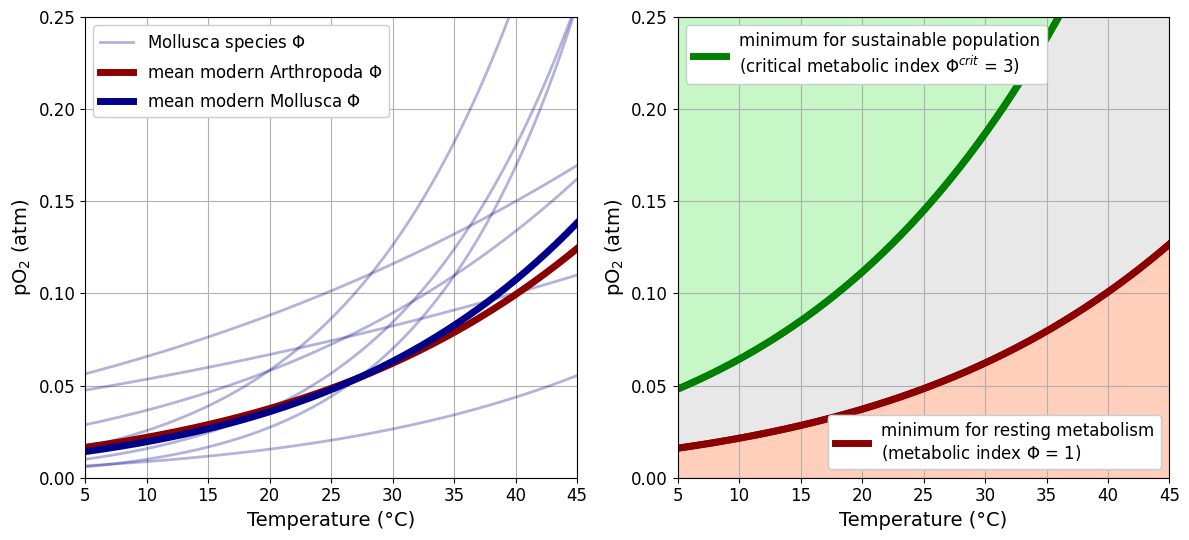

In [5]:
def pO2_from_metabolic_index(T, A_o, E_o, k_b, T_ref, Phi=1):
    return Phi/A_o * np.exp(-E_o/k_b*(1/(T + 273.15) - 1/T_ref))

# Sample constants
A_o = 26.8  # Example value
E_o = .4  # Example value
k_b = 8.617333262145e-5  # Boltzmann constant in eV/K
T_ref = 288.15  # 15°C in Kelvin

# Temperature range (e.g., from 0°C to 40°C)
T_values = np.linspace(5, 45, 400)


plt.figure(figsize=(12,5.5))

plt.subplot(1,2,1)

mollusca_label_added = False  # Initialize a flag to track if Mollusca species label is added

for index, row in Penn2018_MI_M.iterrows():
    A_o = row['Ao (atm-1)']
    E_o = row['Eo (eV)']
    pO2_values = pO2_from_metabolic_index(T_values, A_o, E_o, k_b, T_ref)
    
    # Choose color based on the "Phylum" column
    label = None  # Default label is None, so it's not added to the legend
    if row["Phylum"] == "A":
        color = "darkred"
    elif row["Phylum"] == "M":
        color = "darkblue"
        if not mollusca_label_added:
            label = 'Mollusca species $\Phi$'  # Only set label for the first Mollusca species entry
            mollusca_label_added = True  # Set the flag to True
    else:
        color = 'grey'  # Default color
    
    plt.plot(T_values, pO2_values, color=color, linewidth=2, alpha=0.3, label=label)

# Plotting mean values for Phylum A
pO2_values_A = pO2_from_metabolic_index(T_values, mean_Ao_A, mean_Eo_A, k_b, T_ref)
plt.plot(T_values, pO2_values_A, color='darkred', label='mean modern Arthropoda $\Phi$', linewidth=5)

# Plotting mean values for Phylum M
pO2_values_M = pO2_from_metabolic_index(T_values, mean_Ao_M, mean_Eo_M, k_b, T_ref)
plt.plot(T_values, pO2_values_M, color='darkblue', label='mean modern Mollusca $\Phi$', linewidth=5)

plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('pO$_2$ (atm)', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12, framealpha=1)
plt.grid(True)
plt.ylim(0,0.25)
plt.xlim(5,45)

plt.subplot(1,2,2)

# Compute the values for metabolic index of 3
pO2_values_3 = pO2_from_metabolic_index(T_values, combined_mean_Ao, combined_mean_Eo, k_b, T_ref, Phi=3)
plt.plot(T_values, pO2_values_3, color='green', label='$\Phi^{crit}$ (metabolic index * 3)', linewidth=5)

# Compute the values for metabolic index of 1
pO2_values_1 = pO2_from_metabolic_index(T_values, combined_mean_Ao, combined_mean_Eo, k_b, T_ref, Phi=1)
plt.plot(T_values, pO2_values_1, color='darkred', label='$\Phi$ (metabolic index)', linewidth=5)

# Fill the area between the two curves
plt.fill_between(T_values, pO2_values_3, pO2_values_1, where=(pO2_values_3 > pO2_values_1), color='lightgray', alpha=0.5, interpolate=True)

# Fill the area above the blue curve
plt.fill_between(T_values, pO2_values_3, 0.25, where=(pO2_values_3 <= 0.25), color='lightgreen', alpha=0.5)

# Fill the area below the red curve
plt.fill_between(T_values, pO2_values_1, 0, where=(pO2_values_1 >= 0), color='lightsalmon', alpha=0.5)

# Create legend for the first item (green line)
line1, = plt.plot(T_values, pO2_values_3, color='green', linewidth=5)
leg1 = plt.legend([line1], ['minimum for sustainable population\n(critical metabolic index $\Phi^{crit}$ = 3)'], loc='upper left', fontsize=12, framealpha=1)

# Create legend for the second item (red line)
line2, = plt.plot(T_values, pO2_values_1, color='darkred', linewidth=5)
leg2 = plt.legend([line2], ['minimum for resting metabolism\n(metabolic index $\Phi$ = 1)'], loc='lower right', fontsize=12, framealpha=1)

# Add the second legend manually to the current Axes
plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('pO$_2$ (atm)', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.grid(True)
plt.ylim(0,0.25)
plt.xlim(5,45)
plt.tight_layout()
plt.savefig('../figures/metabolic_index.pdf')
plt.show()